In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
folder = "AmorphousFriction/Ep40Q4Ca00"

In [21]:
keys = ['angle_bl','angle_br','angle_tl','angle_tr','time',
        'position_lower','position_upper','radius_lower','radius_upper','xcom']

In [22]:
shear_data = dict()
for k in keys:
    shear_data[k] = np.loadtxt(folder+'/'+k+'.txt')

In [23]:
shear_data['xcom']

array([19.93474316, 19.93677267, 19.9718721 , ..., 17.94410337,
       17.98474048, 18.02257319])

In [35]:
x_tl = (shear_data['position_upper']-0.5*shear_data['radius_upper'])-shear_data['xcom']
x_tr = (shear_data['position_upper']+0.5*shear_data['radius_upper'])-shear_data['xcom']
x_bl = (shear_data['position_lower']-0.5*shear_data['radius_lower'])-shear_data['xcom']
x_br = (shear_data['position_lower']+0.5*shear_data['radius_lower'])-shear_data['xcom']

In [36]:
x_tot = np.concatenate((x_tl-np.mean(x_tl),x_tr-np.mean(x_tr),x_bl-np.mean(x_bl),x_br-np.mean(x_br)),axis=0)

In [37]:
sigma = np.std(x_tot)
print(sigma)

0.29443899131598633


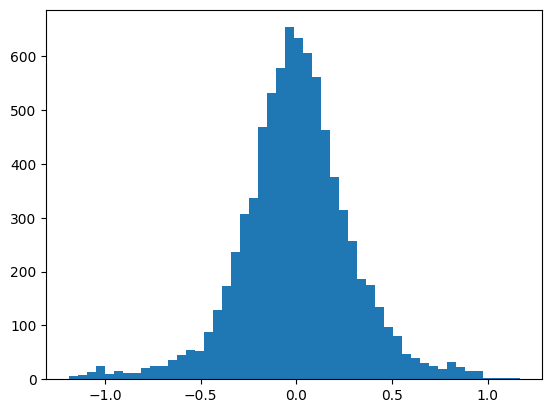

In [38]:
nbins = 50
counts, bins, bars = plt.hist(x_tot,bins=nbins)
plt.show()

In [28]:
x_range = np.linspace(-max(np.abs(bins[0]),np.abs(bins[-1])),max(np.abs(bins[0]),np.abs(bins[-1])),100)
gauss = 1.0/(np.sqrt(2.0*np.pi)*sigma)*np.exp(-np.power(x_range/sigma,2.0)/2)

In [29]:
db = bins[1]-bins[0]
bins_centre = bins[0:nbins]+0.5*db
counts_norm = counts/np.sum(counts*db)

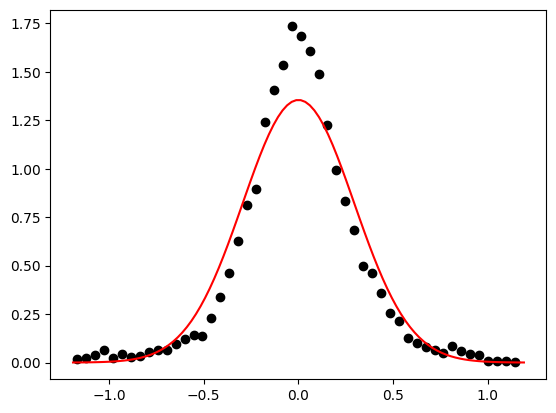

In [30]:
plt.plot(bins_centre,counts_norm,'ko')
plt.plot(x_range,gauss,'r-')
plt.show()